# Running our Custom Object-Detection Model on Yolov4 

This Notebook allows you to try out the object-detection model we built.

All the steps below need to be run in order to run the final detection

# Step 1: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.




In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15420 (delta 1), reused 6 (delta 1), pack-reused 15413
Receiving objects: 100% (15420/15420), 14.08 MiB | 20.68 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [2]:
# change makefile to have GPU enabled (we do not use OpenCV)
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# Step 2: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 3: Uploading the Google Drive Files to Use
 This step will show you how to upload Google Drive files to the cloud VM and run detections on them!

You have to connect the Google Drive to the cloud VM.

**NOTE:** We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

- The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!

Now you can run YOLOv4 with images from Google Drive using the darknet command:


In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'3rd semester'
'Assessment year'
'Bachelor '
'Casebook + Pre-questions: 2021'
'Case Class 2020 21 Materials and Submission Folder'
'Colab Notebooks'
'Computer Science'
'Data Analytics '
 images
 Leadership
 Maths
'My Drive'
 MyNoteBookFolder
 Notability
'Notability (1)'
'Notability (2)'
'Notability (3)'
 projectstone
'StartUP campus'
 yolo_custom
 yolov3
 yolov4
 yolov4_2
 yolov4-20220511T163549Z-001.zip
 YOLOv4_Training_Tutorial.ipynb


In [8]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


In [9]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training) 
!ls /mydrive/yolov4_2

 backup			        generate_test.py    obj.zip
'Copy of Final Version.ipynb'   generate_train.py   test
'Copy of yolov4-obj.cfg'        obj.data	    test.zip
'Final Version.ipynb'	        obj.names	    yolov4-obj.cfg


In [10]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4_2/obj.zip ../
!cp /mydrive/yolov4_2/test.zip ../

In [11]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/1.png          
  inflating: data/obj/1.txt          
  inflating: data/obj/10.png         
  inflating: data/obj/10.txt         
  inflating: data/obj/11.png         
  inflating: data/obj/11.txt         
  inflating: data/obj/12.png         
  inflating: data/obj/12.txt         
  inflating: data/obj/13.png         
  inflating: data/obj/13.txt         
  inflating: data/obj/14.png         
  inflating: data/obj/14.txt         
  inflating: data/obj/15.png         
  inflating: data/obj/15.txt         
  inflating: data/obj/16.png         
  inflating: data/obj/16.txt         
  inflating: data/obj/17.png         
  inflating: data/obj/17.txt         
  inflating: data/obj/18.png         
  inflating: data/obj/18.txt         
  inflating: data/obj/19.png         
  inflating: data/obj/19.txt         
  inflating: data/obj/2.png          
  inflating: data/obj/2.txt          
  inflating: data/obj/20.png         
  inflating: data/obj/20.txt 

In [12]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4_2/yolov4-obj.cfg ./cfg

## ii) obj.names and obj.data 
These files are already found within the Github. They need to be move to Google Drive and subsequently to the cloud VM.

In [13]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4_2/obj.names ./data
!cp /mydrive/yolov4_2/obj.data  ./data

## iii) Generating train.txt and test.txt
The last configuration files needed before we can begin to train our custom detector are the train.txt and test.txt files which hold the relative paths to all our training images and valdidation images.

We have modified the generate files to fit within our own deteciton model  eaily generate these two files withe proper paths to all images.

Just upload them to your Google Drive so we can use them in the Colab Notebook.

In [14]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4_2/generate_train.py ./
!cp /mydrive/yolov4_2/generate_test.py ./

Now simply run both scripts to do the work for you of generating the two txt files.

In [15]:
!python generate_train.py
!python generate_test.py

In [16]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


After training, you can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you should aim for a loss under 2.

# Step 6: Checking the Mean Average Precision (mAP) of Your Model
Run the following command on any of the saved weights from the training to see the mAP value for that specific weight's file. You can run in on the multiple weights found in the Github to compare and find the weights with the highest mAP as that is the most accurate one!

The yolov4-obj_4000.weights file has the best mAP


In [22]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4_2/backup/yolov4-obj_4000.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


# Step 7: Run Your Custom Object Detector!!!
We have uploaded a number of test files in the Github to try the object-detection model! 

In [17]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


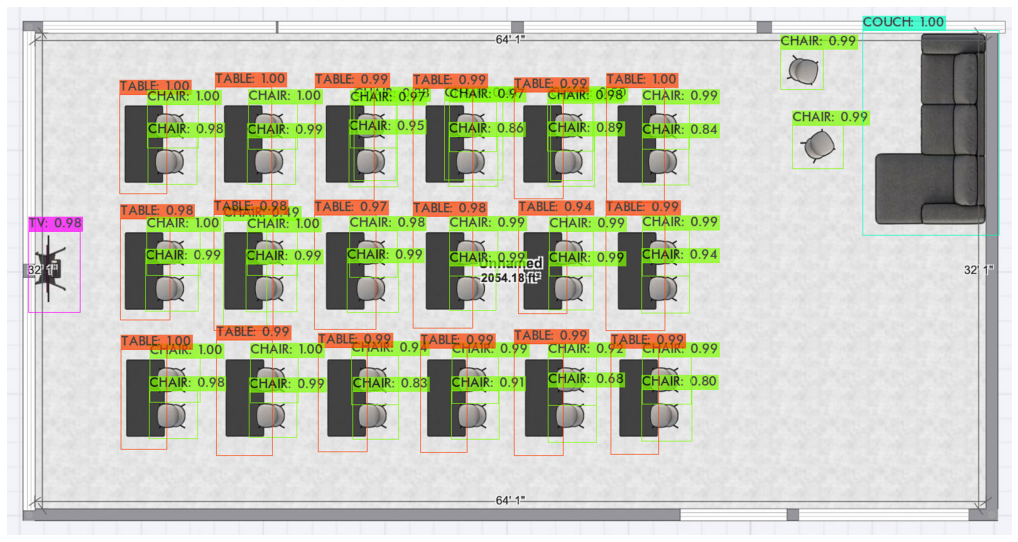

In [23]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4_2/backup/yolov4-obj_last.weights /mydrive/yolov4_2/test/Configuration4.jpeg -thresh 0.3
imShow('predictions.jpg')